# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv"
titanic_data = pd.read_csv(data_url)

In [7]:
titanic_data.shape

(891, 12)

#Data Preprocessing 

In [8]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'NaNs filled using mean of Age')

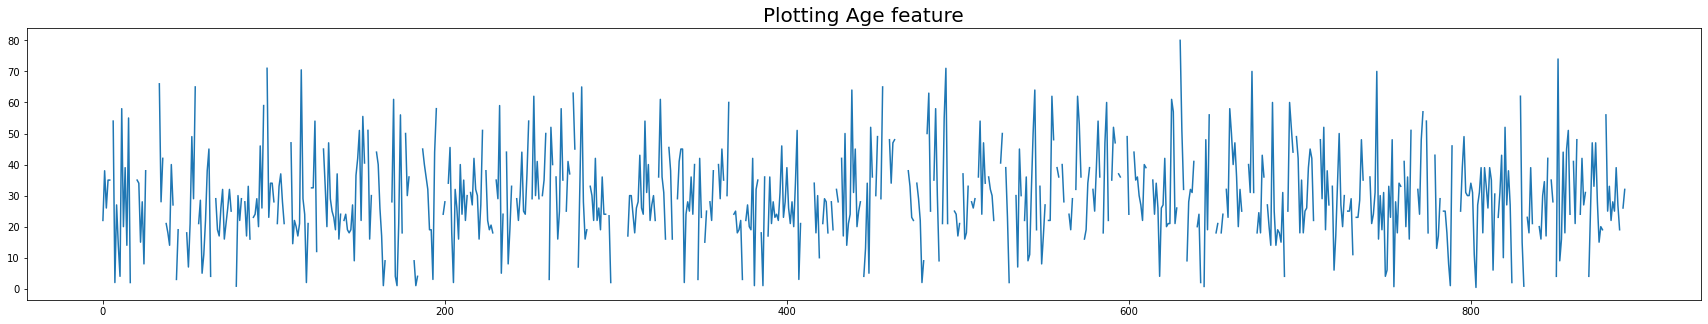

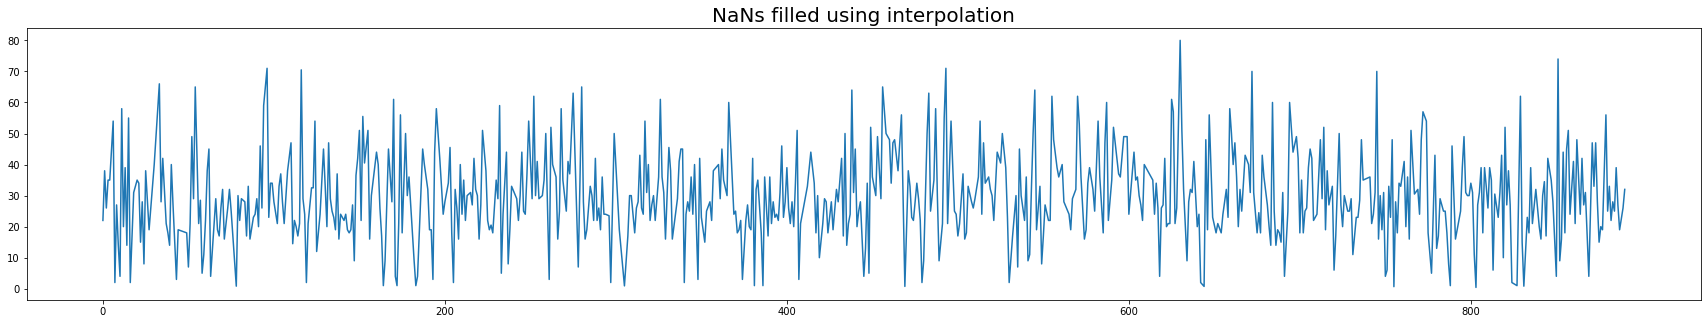

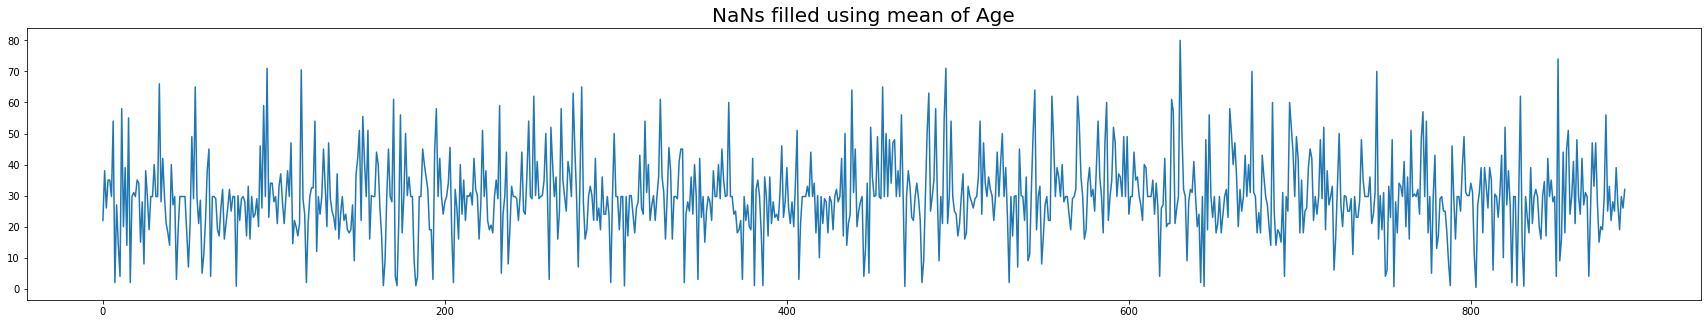

In [11]:
import matplotlib.pyplot as plt

age = titanic_data.Age
plt.figure(figsize=(30,5))
age.plot()
plt.title('Plotting Age feature', fontsize=20)
plt.figure(figsize=(30,5))
age.interpolate().plot()
plt.title('NaNs filled using interpolation',fontsize=20)
plt.figure(figsize=(30,5))
age.fillna(age.mean()).plot()
plt.title('NaNs filled using mean of Age', fontsize=20)

Observation: Here, the disconuities in the first graph are the NaNs in the `Age` column. So, out of two ways to fill in for them, we choose to interpolate the data to preserve it's continuity.

In [0]:
cabin = titanic_data.Cabin
cabin.fillna('NA')

0        NA
1       C85
2        NA
3      C123
4        NA
       ... 
886      NA
887     B42
888      NA
889    C148
890      NA
Name: Cabin, Length: 891, dtype: object

Observation: 
1. Filling NaNs in `Cabin` to another label called 'NA'
2. Here, along with Cabin labels, they've also provided the room/seat numbers. So, we can drop those numbers and just have the lettered Cabins as labels

In [0]:
print('No. of NaNs', titanic_data.Embarked.isna().sum())
titanic_data.Embarked.value_counts()

No. of NaNs 2


S    644
C    168
Q     77
Name: Embarked, dtype: int64

Observation: There are only 2 number of empty elements in `Embarked`. So, it can be filled by the most frequently occuring case, which is 'S'

In [0]:
# removing unnecessary columns
rem_cols = ['PassengerId', 'Name', 'Ticket']
data = titanic_data.drop(columns=rem_cols)

# Filling in missing data
# Age is interpolated
data.Age = data.Age.interpolate()

# Missing data in cabin is filled with 'NA'
data.Cabin=data.Cabin.fillna('NA')

# The missing values of Embarked columns is filled with the most occuring value 'S'
data.Embarked = data.Embarked.fillna('S')

# Dropping the seat/room numbers to convert this column into fewer labels
cabs = [cab[0] for cab in data.Cabin]
data.Cabin = pd.Series(cabs)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,N,S


In [0]:
# Ordinal Encoding Categorical Data

cat_cols = ['Sex','Embarked','Cabin'] 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in cat_cols:
    data[col]=enc.fit_transform(data[col])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,7,2


#Classification


Train data score: 0.9962546816479401
Test data score: 0.7619047619047619

 Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       215
           1       0.71      0.68      0.69       142

    accuracy                           0.76       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.76      0.76      0.76       357


 Confusion Matrix 
 [[176  39]
 [ 46  96]]

 Area under ROC Curve = 0.8176711431378971 



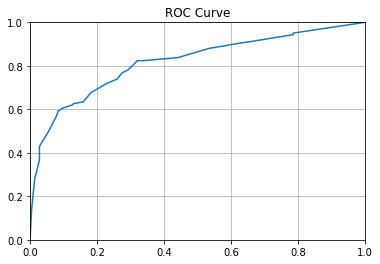

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np
X = data.drop(columns=['Survived','Cabin'])
y = data.Survived

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.4, random_state=3)

clf = RandomForestClassifier(n_estimators=25, random_state = 3)
clf.fit(X_tr,y_tr)
y_pred = clf.predict(X_ts)
y_pred_score=clf.predict_proba(X_ts)[:,1]
print('Train data score: %s' %clf.score(X_tr,y_tr))
print('Test data score: %s' %clf.score(X_ts,y_ts))
print('\n Classification Report \n',classification_report(y_ts,y_pred))
print('\n Confusion Matrix \n', confusion_matrix(y_ts,y_pred))

fpr, tpr, _ = roc_curve(y_ts,y_pred_score)
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(True)
print('\n Area under ROC Curve = %s \n'%auc(fpr,tpr))

Observation: 
1. Training Data Accuracy: 99%

(On Validation Data)
2. Overall Accuracy: 76%
3. Class 0 f1 score: 0.81, Class 1 f1 score: 0.69
4. AUC-ROC: 0.8176

Train data score: 0.8426966292134831
Test data score: 0.7563025210084033

 Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       215
           1       0.70      0.69      0.69       142

    accuracy                           0.76       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.76      0.76      0.76       357


 Confusion Matrix 
 [[172  43]
 [ 44  98]]

 Area under ROC Curve = 0.794251555846708 



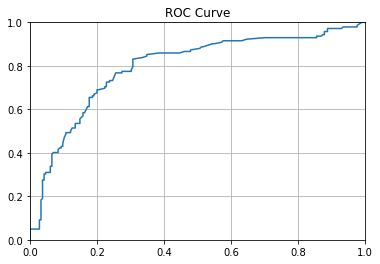

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np
X = data.drop(columns=['Survived','Cabin'])
y = data.Survived

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.4, random_state=3)

clf = AdaBoostClassifier(n_estimators=50, random_state = 3)
clf.fit(X_tr,y_tr)
y_pred = clf.predict(X_ts)
y_pred_score=clf.predict_proba(X_ts)[:,1]
print('Train data score: %s' %clf.score(X_tr,y_tr))
print('Test data score: %s' %clf.score(X_ts,y_ts))
print('\n Classification Report \n',classification_report(y_ts,y_pred))
print('\n Confusion Matrix \n', confusion_matrix(y_ts,y_pred))

fpr, tpr, _ = roc_curve(y_ts,y_pred_score)
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(True)
print('\n Area under ROC Curve = %s \n'%auc(fpr,tpr))

Observation: 
1. Training Data Accuracy: 84%

(On Validation Data)
2. Overall Accuracy: 75%
3. Class 0 f1 score: 0.80, Class 1 f1 score: 0.69
4. AUC-ROC: 0.7942

Train data score: 0.9719101123595506
Test data score: 0.7843137254901961

 Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       215
           1       0.74      0.70      0.72       142

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357


 Confusion Matrix 
 [[180  35]
 [ 42 100]]

 Area under ROC Curve = 0.812397641663937 



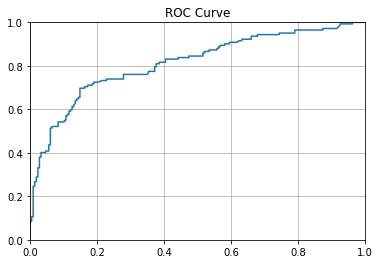

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np
X = data.drop(columns=['Survived','Cabin'])
y = data.Survived

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.4, random_state=3)

clf = XGBClassifier(n_estimators=750, random_state = 3)
clf.fit(X_tr,y_tr)
y_pred = clf.predict(X_ts)
y_pred_score=clf.predict_proba(X_ts)[:,1]
print('Train data score: %s' %clf.score(X_tr,y_tr))
print('Test data score: %s' %clf.score(X_ts,y_ts))
print('\n Classification Report \n',classification_report(y_ts,y_pred))
print('\n Confusion Matrix \n', confusion_matrix(y_ts,y_pred))

fpr, tpr, _ = roc_curve(y_ts,y_pred_score)
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(True)
print('\n Area under ROC Curve = %s \n'%auc(fpr,tpr))

Observation: 
1. Training Data Accuracy: 97%

(On Validation Data)
2. Overall Accuracy: 78%
3. Class 0 f1 score: 0.82, Class 1 f1 score: 0.72
4. AUC-ROC: 0.8124

#Conclusion:

1. Training Data Accuracy of both RFC and XGB are very good
2. The best validation accuracy in the case of XGB being 78%
3. f1 scores are improved in XGB compared to RFC or ADB
4. Area under ROC curves are comparable in case of RFC and XGB and better compared to ADB

So, we can conclude that XGB is a better classifier compared to others here